# Task 3 - Training a Variational Autoencoder on MNIST

in this task, we will train a variational autoencoder to reconstruct and generate images of handwritten digits.

In [8]:
import init_notebook
import warnings
from torchvision.datasets import MNIST
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from sklearn.preprocessing import StandardScaler
from vae import VAETrainer, VAEConfig

warnings.simplefilter(action='ignore', category=FutureWarning)

## Part I: Reading the dataset

We first have to download tthe dsta. We are using pytorch's own dataset.

In [9]:
mnist =  MNIST(root = './', download = True)
X = mnist.data
y = mnist.targets

print(f"input shape:",list(X.shape))
print(f"targets/y shape:",list(y.shape))
print("pixel [min, max]:",f"[{X.min().item()}, {X.max().item()}]")

input shape: [60000, 28, 28]
targets/y shape: [60000]
pixel [min, max]: [0, 255]


Now we plot a random sample of 3 images from the dataset to see what the data looks like

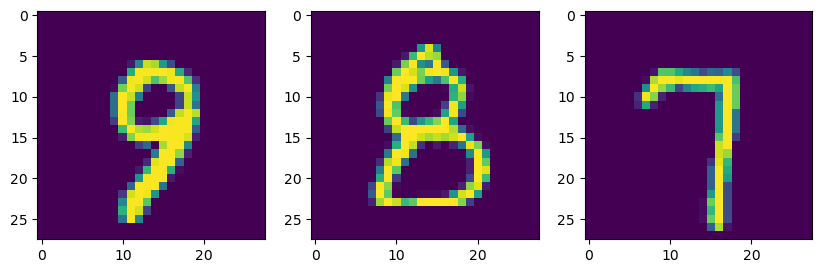

In [10]:
three_random_indices = np.random.randint(low=0, high=X.shape[0] - 1, size=3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

for i, axis in zip(three_random_indices, axes):
    image = X[i]
    axis.imshow(image)

## Part II: Preprocessing

Here we do simple preprocessing steps in order to prepare the data for the model

### Scaling

In [11]:
X = X / 255
print(X.min().item(), X.max().item())

0.0 1.0


### Flattening

In [12]:
X = X.view(X.shape[0], -1)
X.shape

torch.Size([60000, 784])

### Train-Test Split

In [13]:
n = len(X)

randomindices = torch.randperm(n)
train_size = int(0.8 * n)

X_train = X[:train_size]
y_train = y[:train_size]
train_dataset = TensorDataset(X_train, y_train)


X_test = X[train_size:]
y_test = y[train_size:]
test_dataset = TensorDataset(X_test, y_test)

print("Train-Test Split:", train_size, n - train_size)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Train-Test Split: 48000 12000
Shape of X_train: torch.Size([48000, 784])
Shape of y_train: torch.Size([48000])
Shape of X_test: torch.Size([12000, 784])
Shape of y_test: torch.Size([12000])


## Part III: Training
We now train the dataset using the different scenarios in the exercise sheet

### Configuration I: 2 Latent Dimentions

Train: 100%|██████████| 375/375 [00:01<00:00, 307.02it/s, epoch=1, kl_loss=262.1866, loss=10932.4615, lr=0.0010, mse_loss=8657.5791] 


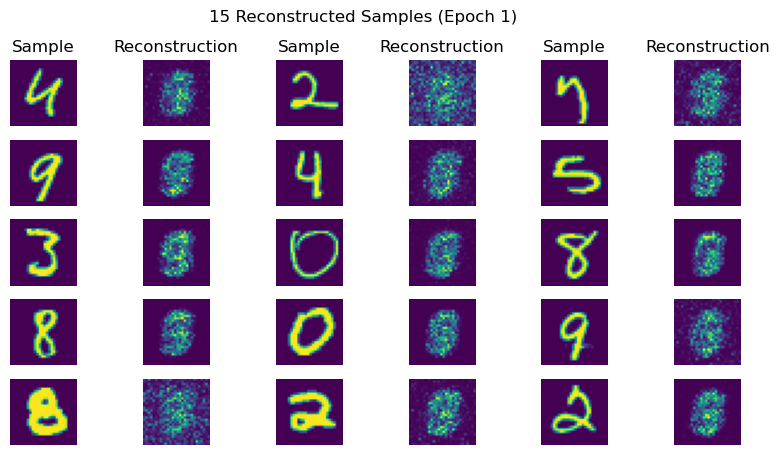

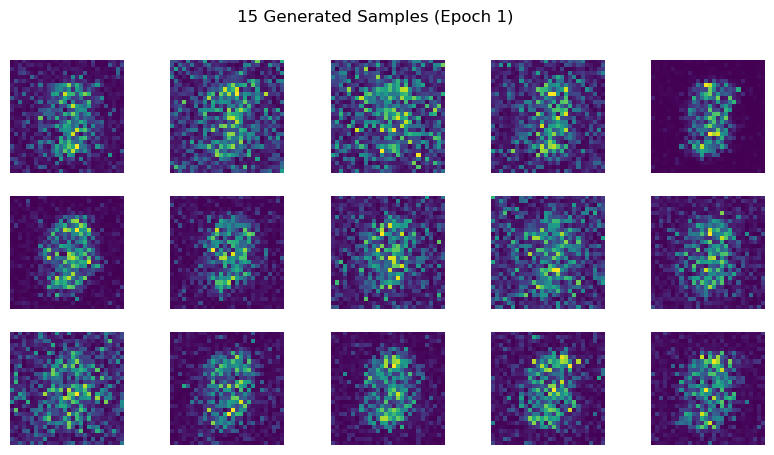

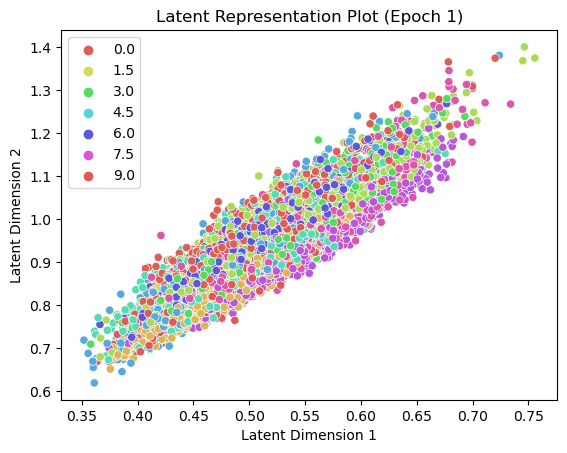

Train: 100%|██████████| 375/375 [00:01<00:00, 370.52it/s, epoch=5, kl_loss=243.0753, loss=7760.1581, lr=0.0010, mse_loss=7243.5142]


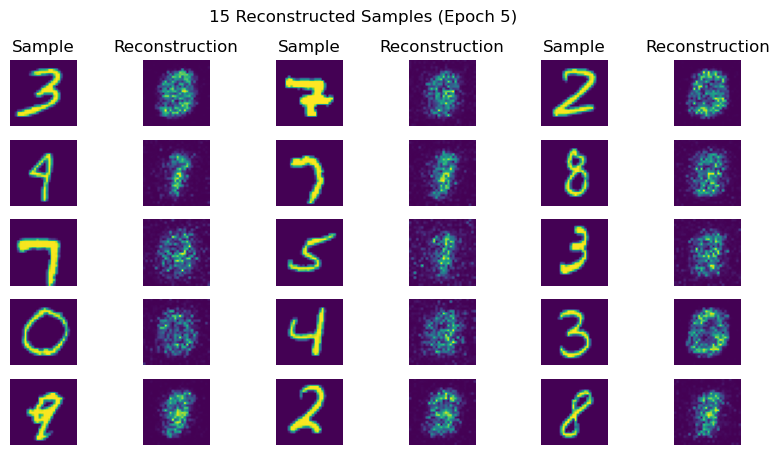

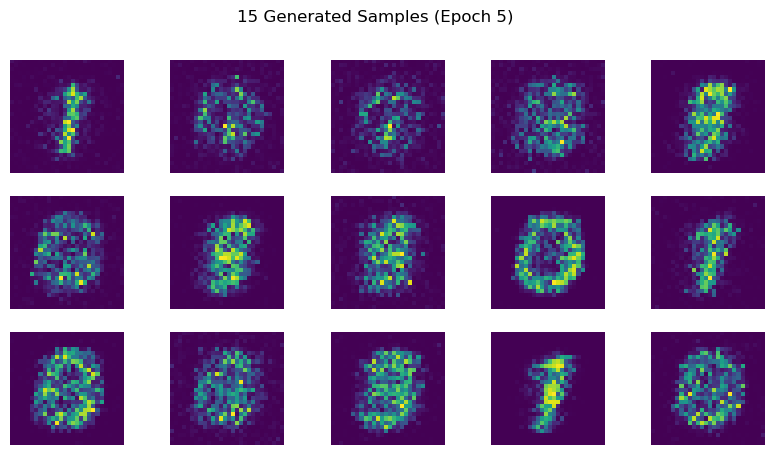

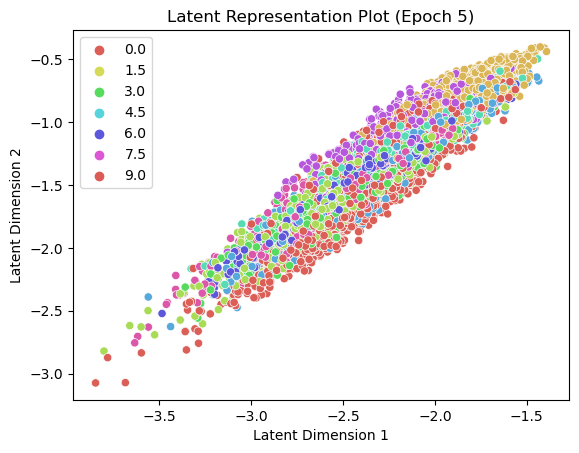

Train:  51%|█████▏    | 193/375 [00:00<00:00, 273.57it/s, epoch=12, kl_loss=373.6337, loss=7014.3736, lr=0.0010, mse_loss=6765.8428]

KeyboardInterrupt: 

Train:  52%|█████▏    | 194/375 [00:14<00:00, 273.57it/s, epoch=12, kl_loss=373.6337, loss=7014.3736, lr=0.0010, mse_loss=6765.8428]

In [14]:
config = VAEConfig(
    input_dim=28 * 28,
    latent_dim=2,
    encoder_layers=[256, 256],
    decoder_layers=[256, 256],
    learning_rate=0.001,
    batch_size=128,
    epochs=200,
    visualization_interval=[1, 5, 25, 50],
    output_linear=False
)

vae_trainer = VAETrainer(config=config, train_set=train_dataset, test_set=test_dataset)
vae_trainer.train()

### Configuration II: 32 Latent Dimentions

In [ ]:
config = VAEConfig(
    input_dim=28 * 28,
    latent_dim=32,
    encoder_layers=[256, 256],
    decoder_layers=[256, 256],
    learning_rate=0.001,
    batch_size=128,
    epochs=200,
    visualization_interval=[1, 5, 25, 50],
)

vae_trainer = VAETrainer(config=config, train_set=train_dataset, test_set=test_dataset)
vae_trainer.train()